# Kaggle

In [1]:
# for show  .plot() in ipython notebook 
%matplotlib inline

import pandas as pd #for data manipulation
import numpy as np  #for multidimensional array computing
from matplotlib import pyplot as plt
import matplotlib as mp # for data visualization
mp.style.use('ggplot') #

Load Data

In [2]:
train_data=pd.read_csv('data/train.csv')
#test_data=pd.read_csv('data/test.csv')

Data Info

In [20]:
#print('Train Data Info')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Data Head

In [21]:
#print('Train Data Head')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Describe  (.describe() method to look at different characteristics of each numeric column.) Note: Only the numeric columns were shown

In [33]:
#print('Train Data Describe')
train_data.describe()
#test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Age column has a count of 714 when all the other columns have a count of 891. This indicates that there are missing values in the Age column -- the count is of non-missing (null, NA, or not a number) values.


In [4]:
#train_data["Age"]=train_data["Age"].fillna(titanic["Age"].median())
train_data["Age"].fillna(train_data["Age"].median(),inplace=True)
#test_data["Age"].fillna(test_data["Age"].median(),inplace=True)
train_data.describe()
#test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Several of our columns are non-numeric, which is a problem when it comes time to make predictions -- we can't feed non-numeric columns into a machine learning algorithm and expect it to make sense of them.

We have to either exclude our non-numeric columns when we train our algorithm (Name, Sex, Cabin, Embarked, and Ticket), or find a way to convert them to numeric columns.

The Sex column is non-numeric, but we want to keep it around -- it could be very informative. We can convert it to a numeric column by replacing each gender with a numeric code. A machine learning algorithm will then be able to use these categories to make predictions.We'll also assign a code of 0 to male, and a code of 1 to female.

In [5]:
train_data.loc[train_data["Sex"] == "male", "Sex"] = 0
train_data.loc[train_data["Sex"] == "female", "Sex"] = 1

print(train_data["Sex"].isnull().sum())

0


We now can convert the Embarked column to codes the same way we converted the Sex column.


In [6]:
print(train_data["Embarked"].unique())

#The most common embarkation port is S, so let's assume everyone got on there
train_data["Embarked"].fillna("S", inplace = True)

train_data.loc[train_data["Embarked"] == "S","Embarked"] = 0
train_data.loc[train_data["Embarked"] == "C","Embarked"] = 1
train_data.loc[train_data["Embarked"] == "Q","Embarked"] = 2

train_data.describe()

['S' 'C' 'Q' nan]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize

Visualize survival based on the gender

          man  female
Survived  109     233
Dead      468      81


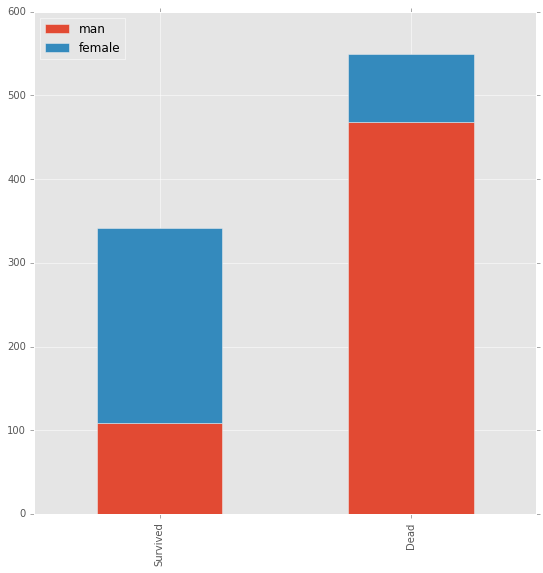

In [7]:
survived_sex = train_data[train_data["Survived"] == 1]["Sex"].value_counts()
#survived_sex = train_data.loc[train_data["Survived"] == 1,"Sex"].value_counts()
#print (survived_sex)

dead_sex = train_data[train_data["Survived"] == 0]["Sex"].value_counts()

df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.columns=['man','female']
print(df)
df.plot(kind='bar',stacked=True, figsize=(9,9))
#df.plot(kind='bar',stacked=False, figsize=(16,9))


Women are more likely to survive. :) "Women and children first !".

Let's now correlate the survival with the age variable.

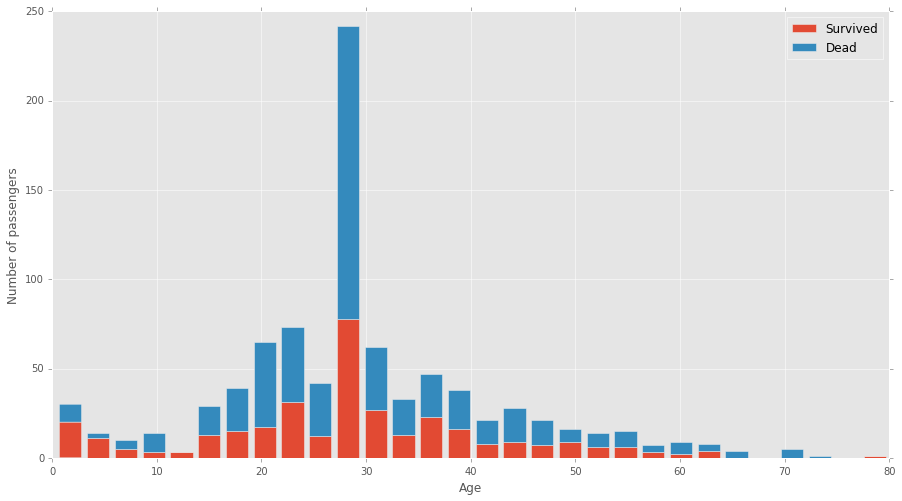

In [27]:
plt.figure(figsize = (15,8))
plt.hist([train_data[train_data["Survived"]==1]["Age"],train_data[train_data["Survived"]==0]["Age"]],
         stacked=True,bins=30,label=["Survived","Dead"])
plt.xlabel('Age')
plt.ylabel('Number of passengers')

plt.legend()
#plt.show() #TODO:Learn: What is difference from legend()

Let's now focus on the Fare ticket of each passenger and correlate it with the survival.

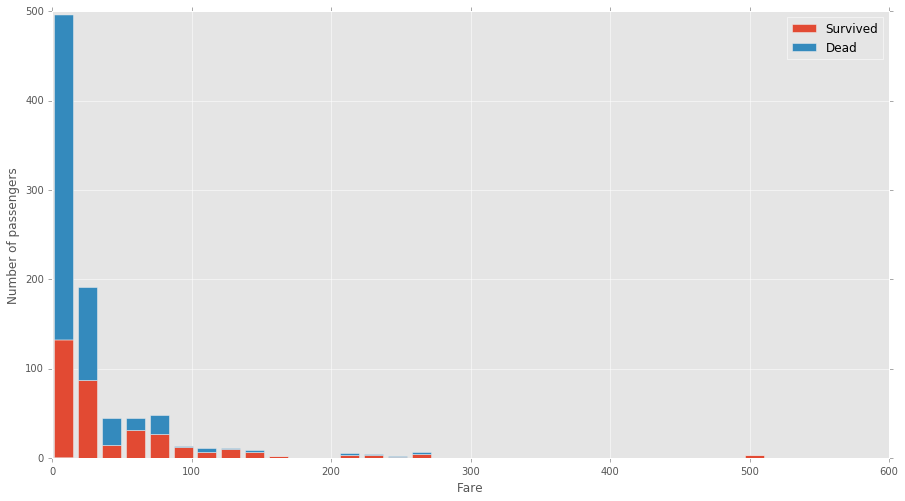

In [28]:
plt.figure(figsize = (15,8))
plt.hist([train_data[train_data["Survived"]==1]["Fare"],train_data[train_data["Survived"]==0]["Fare"]],
         stacked=True,bins=30,label=["Survived","Dead"])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')

plt.legend()

In fact, the ticket fare correlates with the class as we see it in the chart below.


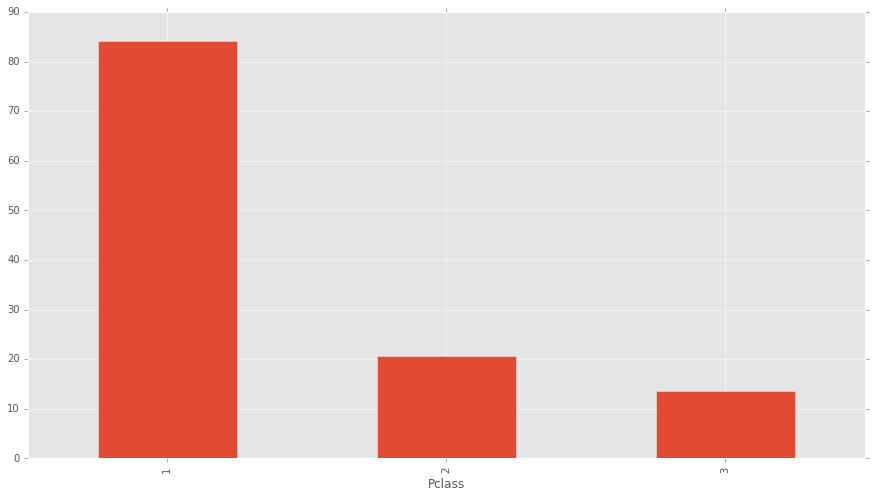

In [29]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
train_data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(9,8),ax = ax)

Let's now see how the embarkation site affects the survival.

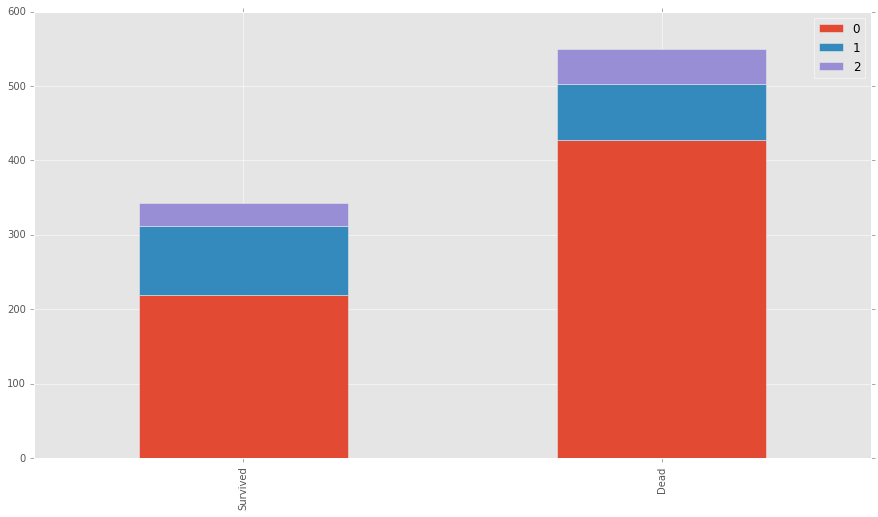

In [31]:
survived_embark = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead_embark = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(9,8))
